In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv("../Dataset/Dataset.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Dataset Description
The dataset contains information about restaurants including cuisine type,
pricing, and customer ratings. This task focuses on building a content-based
restaurant recommendation system using user preference criteria.


In [3]:
df_rec = df[[
    'Restaurant Name',
    'Cuisines',
    'Price range',
    'Aggregate rating'
]]


In [4]:
df_rec.dropna(inplace=True)
df_rec.reset_index(drop=True, inplace=True)


/tmp/ipython-input-2562217569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec.dropna(inplace=True)


Rows with missing values were removed to ensure accurate similarity calculations.


In [5]:
le = LabelEncoder()
df_rec['Cuisines_Encoded'] = le.fit_transform(df_rec['Cuisines'])


/tmp/ipython-input-777562153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['Cuisines_Encoded'] = le.fit_transform(df_rec['Cuisines'])


In [6]:
scaler = MinMaxScaler()

df_rec[['Price range', 'Aggregate rating']] = scaler.fit_transform(
    df_rec[['Price range', 'Aggregate rating']]
)


/tmp/ipython-input-2277598179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec[['Price range', 'Aggregate rating']] = scaler.fit_transform(


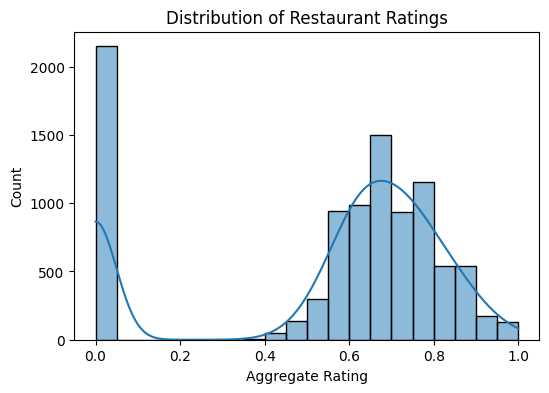

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df_rec['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


This graph shows the distribution of restaurant ratings.
Most restaurants fall within a moderate rating range,
which supports the use of ratings as a recommendation criterion.


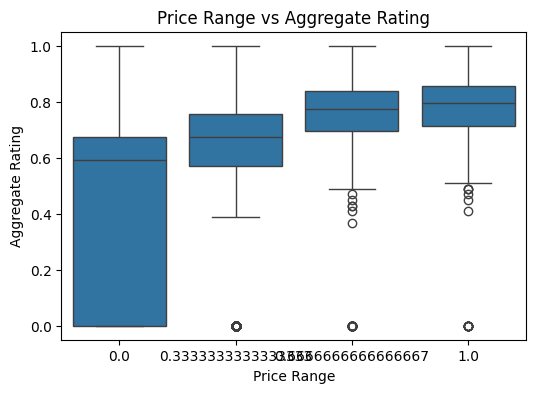

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Price range', y='Aggregate rating', data=df_rec)
plt.title("Price Range vs Aggregate Rating")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()


This visualization highlights how restaurant ratings vary
across different price ranges. It helps understand
the impact of pricing on customer satisfaction.


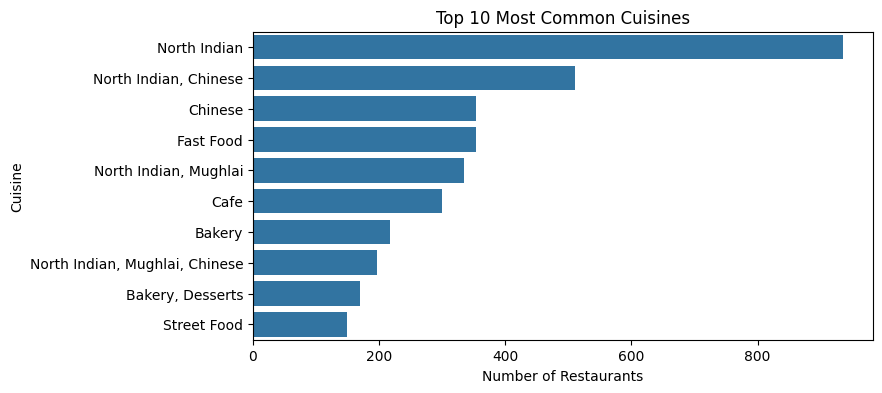

In [15]:
top_cuisines = df_rec['Cuisines'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


The chart displays the most common cuisines in the dataset.
This supports the use of cuisine type as a key feature
in the recommendation system.


Feature scaling was applied to ensure equal contribution of price range
and ratings in similarity computation.


In [7]:
feature_matrix = df_rec[['Cuisines_Encoded', 'Price range', 'Aggregate rating']]


In [8]:
similarity_matrix = cosine_similarity(feature_matrix)


Cosine similarity measures how similar restaurants are based on
cuisine type, pricing, and ratings.


In [9]:
def recommend_restaurants(restaurant_name, top_n=5):
    if restaurant_name not in df_rec['Restaurant Name'].values:
        return "Restaurant not found. Please try another name."

    idx = df_rec[df_rec['Restaurant Name'] == restaurant_name].index[0]

    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    recommended_indices = [
        i[0] for i in similarity_scores[1:top_n+1]
    ]

    return df_rec.loc[recommended_indices, [
        'Restaurant Name',
        'Cuisines',
        'Aggregate rating',
        'Price range'
    ]]


In [10]:
recommend_restaurants("Le Petit Souffle")


,Restaurant Name,Cuisines,Aggregate rating,Price range
355,Hollerbach's Willow Tree Caf��,German,0.979592,0.666667
12,Silantro Fil-Mex,"Filipino, Mexican",0.979592,0.666667
9,Locavore,Filipino,0.979592,0.666667
17,Balay Dako,Filipino,0.918367,0.666667
565,Hot Palayok,"Filipino, Japanese, Asian",0.918367,0.666667


The system recommends restaurants with similar cuisine, price range,
and customer ratings, demonstrating effective content-based filtering.


In [11]:
def recommend_by_preferences(cuisine, max_price_range=3, min_rating=0.6, top_n=5):
    cuisine_encoded = le.transform([cuisine])[0]

    filtered_df = df_rec[
        (df_rec['Cuisines_Encoded'] == cuisine_encoded) &
        (df_rec['Price range'] <= max_price_range) &
        (df_rec['Aggregate rating'] >= min_rating)
    ]

    return filtered_df[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range']].head(top_n)


In [12]:
recommend_by_preferences("French", max_price_range=3, min_rating=0.7)


,Restaurant Name,Cuisines,Aggregate rating,Price range
256,Django,French,0.877551,0.666667
451,Jaan,French,0.775510,1.000000
452,Rhubarb Le Restaurant,French,0.795918,1.000000
9375,Restaurant Gordon Ramsay,French,0.959184,1.000000
9407,The French by Simon Rogan - The Midland,French,0.877551,1.000000


## Conclusion

This task successfully implemented a content-based restaurant
recommendation system using cosine similarity. Restaurants were
recommended based on cuisine type, price range, and customer ratings.
The system also supports user preference-based recommendations,
making it flexible and effective for real-world applications.
